# Initial Exploration: Correlation and Visualization

We have a data set of almost 180.000 campaigns. The data set has mostly (but not completely) been cleaned. Data for 100.000 projects  Download 100.000 projects(training set) is provided to you with information of whether the project was completely funded (succeeded) or not. For the remaining 78.065 projects  Download 78.065 projects(test set) the funding status is withheld. Your assignment is to train a model that will predict the funding status of the remaining projects. You will hand in these predictions, and then we can check how well your model did.

The grading of your project, however, does not depend on the quality of your model, it depends on how well you can explain what you did and why. 
You will show this in a presentation in the last week of the course. 

Funded, what determines it?

Predict funding status of the remaining projects.

launched at after deadline?


In [41]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)


While exploring the data we have understood that the delimeter is a komma, which result in unstructured visual representation of the excel file.

first we check if the deadline or start date had any correlation at all with funding, this was not the case. Furthermore we also tried and see if the funding goal had any effect, this also was not the case. Hence the quantitative data where we have our hands on do not correlate with the funding success

Which ones could introduce bias? What bias exactly?


Linear regression to find correlation
Logistic regression to find ocrrelation between multiple data for true or false classification
check mode for categorical data?


transform datestamp to datetime


multiple columns correlation



In [42]:
trainData = pd.read_csv (r'./KS_model_training_data.csv', sep = ',')
trainData = trainData.drop(columns=['backers_count', 'converted_pledged_amount', 'pledged', 'usd_pledged'])

In [43]:
trainData.isnull().sum()

project_id     0
blurb          2
category       0
country        3
created_at     0
currency       0
deadline       0
fx_rate        0
goal           0
launched_at    0
name           1
staff_pick     0
location       0
funded         0
subcategory    0
project_url    0
reward_url     0
dtype: int64

In [44]:
trainData = trainData.dropna()
np.where(trainData.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

<AxesSubplot:xlabel='funded', ylabel='count'>

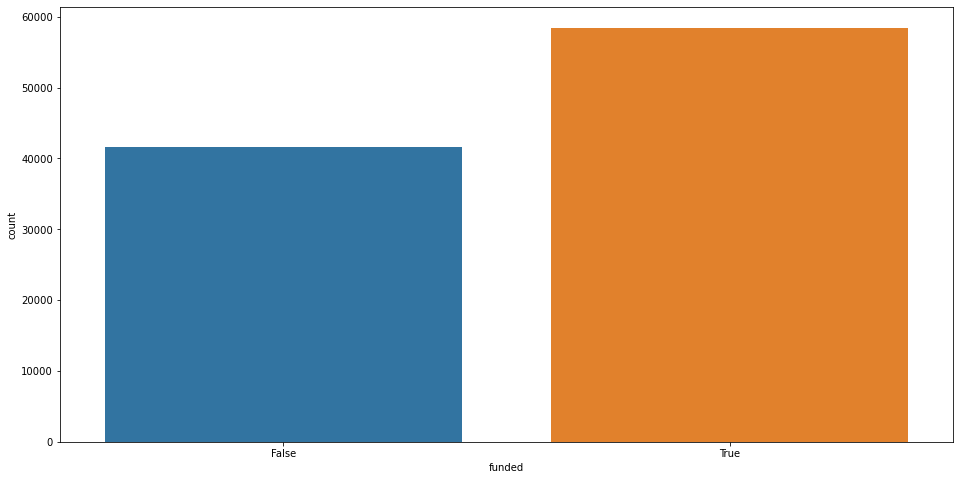

In [45]:
sns.countplot(trainData['funded'])

In [46]:
trainData['created_at'] = pd.to_datetime(trainData['created_at'],unit='s')
trainData['created_month'] = trainData.created_at.apply(lambda x: x.month)
trainData['deadline'] = pd.to_datetime(trainData['deadline'],unit='s')

#derived features
trainData['created_year'] = trainData.created_at.apply(lambda x: x.year)
trainData['blurb_length'] = trainData['blurb'].str.len()
trainData['name_length'] = trainData['name'].str.len()

blength = np.corrcoef(trainData['funded'], trainData['blurb_length'])
nlength = np.corrcoef(trainData['funded'], trainData['name_length'])
print("correlation of blurb_length with respect to funded =  " + str(blength[1][0]))
print("correlation of name_length with respect to funded =  " + str(nlength[1][0]))


correlation of blurb_length with respect to funded =  0.03189320416882825
correlation of name_length with respect to funded =  0.1259085607035713


<AxesSubplot:>

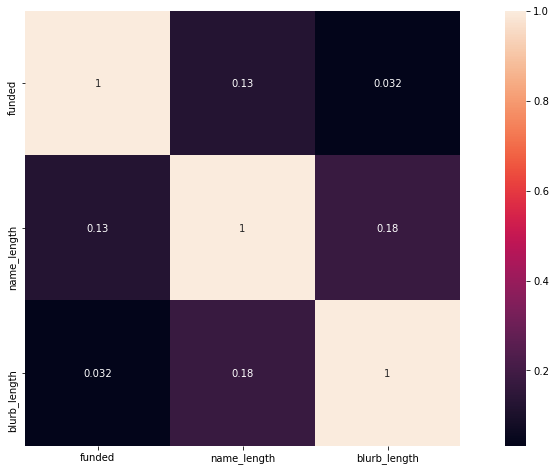

In [47]:
corr = trainData[['blurb_length', 'name_length', 'funded']].corr()
col = corr.nlargest(10, 'funded').index
sns.heatmap(corr.loc[col,col], annot=True, square=True)

In [48]:
trainData.drop(['project_id', 'blurb', 'blurb_length','created_at', 'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'staff_pick', 
                'location', 'project_url', 'reward_url', 'created_month', 'name_length'], 1, inplace=True)


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Year the project was created')]

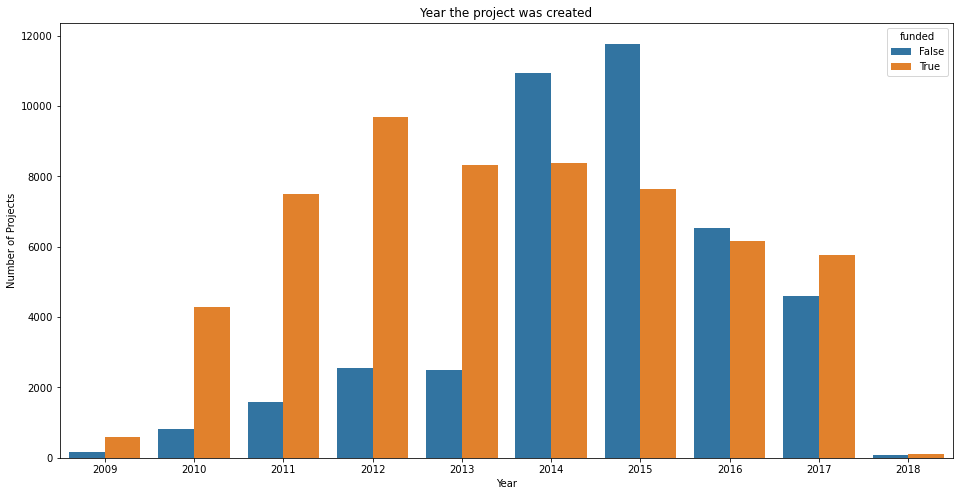

In [49]:
plot = sns.countplot(x=trainData.created_year, hue = trainData.funded)
plot.set(xlabel='Year', ylabel='Number of Projects', title= 'Year the project was created')

https://pbpython.com/categorical-encoding.html
We tried to use labelencoding to give categorical values a code with wich we can then see if there is any correlation between categories and funding.

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Category')]

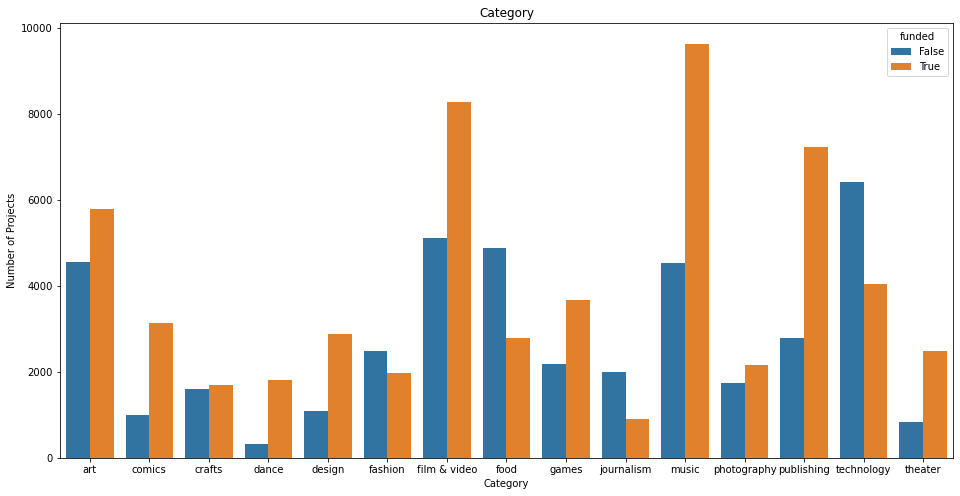

In [50]:
plot = sns.countplot(x=trainData.category, hue = trainData.funded)
plot.set(xlabel='Category', ylabel='Number of Projects', title= 'Category')

We also checked if there was any correlation with projects being launched after the deadline, this was not the case for any of the projects. They were all launched before. launched_after_deadline

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report


testData = pd.read_csv (r'./KS_test_data.csv', sep = ';')
np.where(testData.applymap(lambda x: x == ''))
testData = testData.dropna()

testData['name_length'] = testData['name'].str.len()
testData['blurb_length'] = testData['blurb'].str.len()

testData['created_at'] = pd.to_datetime(testData['created_at'],unit='s')
testData['created_month'] = testData.created_at.apply(lambda x: x.month)
testData['created_year'] = testData.created_at.apply(lambda x: x.year)




In [52]:
testData.drop(['project_id', 'blurb','blurb_length','created_at', 'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'staff_pick', 
                'location', 'project_url', 'reward_url', 'created_month', 'name_length'], 1, inplace=True)


In [53]:
categoriesToEncode = ['category', 'subcategory', 'currency', 'country']
trainDataHotEncoded = pd.get_dummies(trainData, prefix='category', columns=categoriesToEncode)
testDataHotEncoded = pd.get_dummies(testData, prefix='category', columns=categoriesToEncode)

In [56]:
y = trainDataHotEncoded['funded']
X = trainDataHotEncoded.drop('funded', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors = 27, leaf_size=20, p = 2)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)

# print(classification_report(y_test, knn.predict(X)))
print("accuracy = " + str(round(100 * accuracy)) + "%")

accuracy = 75%


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5)

In [57]:
X = testDataHotEncoded
testDataHotEncoded['prediction'] = knn.predict(X)
testDataHotEncoded.to_csv('predictions.tsv', columns=['project_id','prediction'])

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 363 while Y.shape[1] == 362

In [215]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X)
accuracy = logreg.score(X_test, y_test)
print("accuracy = " + str(round(100 * accuracy)) + "%")


accuracy = 63%


Gridsearch algorithm to determine the best hyperparameters for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV


#source
#https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])